In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset(s).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
churn_rate = (5174/7043)*100

In [ ]:
churn_rate

73.4630129206304

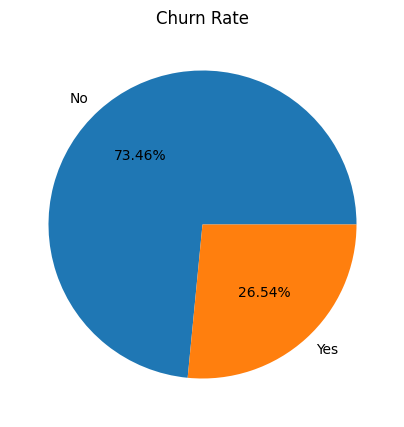

In [ ]:
# CHURN RATE

plt.figure(figsize = (5,5))
plt.pie(df['Churn'].value_counts(), labels = ['No','Yes'], autopct = '%0.2f%%')
plt.title('Churn Rate')
plt.show()

In [4]:
churn_group = df[df["Churn"] == "Yes"]
non_churn_group = df[df["Churn"] == "No"]

In [ ]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

**Customer's** **Demographics**

In [ ]:
df_men = df[df['gender']!= 'Female']

In [ ]:
df_wmen = df[df['gender']!= 'Male']

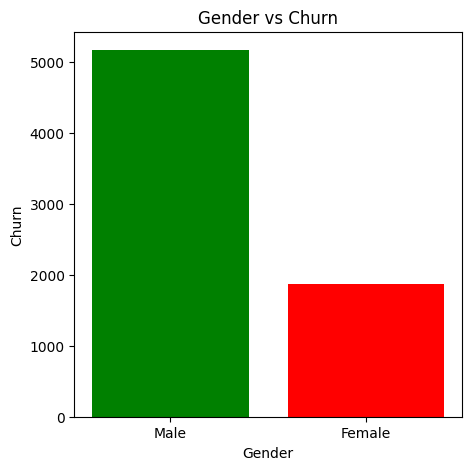

In [ ]:
plt.figure(figsize = (5,5))

plt.bar(df['gender'].value_counts().keys(), df['Churn'].value_counts(), color = ('green','red'))
plt.xlabel('Gender')
plt.ylabel('Churn')
plt.title('Gender vs Churn')
plt.show()

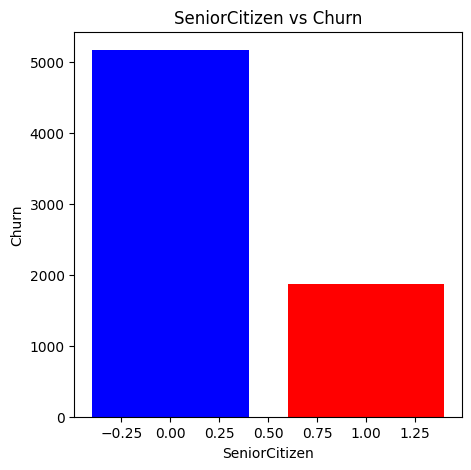

In [ ]:
plt.figure(figsize = (5,5))

plt.bar(df['SeniorCitizen'].value_counts().keys(), df['Churn'].value_counts(), color = ('blue','red'))
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.title('SeniorCitizen vs Churn')
plt.show()

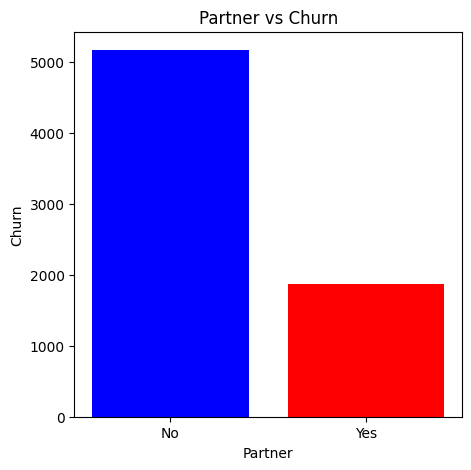

In [ ]:
plt.figure(figsize = (5,5))

plt.bar(df['Partner'].value_counts().keys(), df['Churn'].value_counts(), color = ('blue','red'))
plt.xlabel('Partner')
plt.ylabel('Churn')
plt.title('Partner vs Churn')
plt.show()

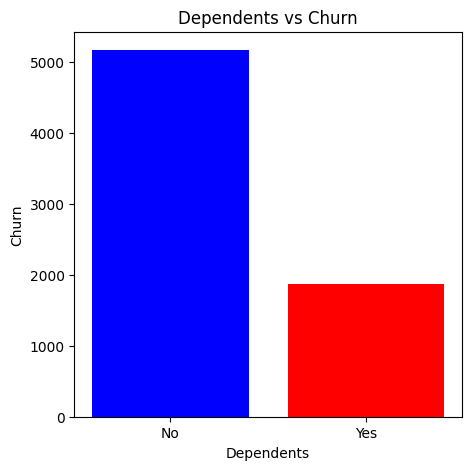

In [ ]:
plt.figure(figsize = (5,5))

plt.bar(df['Dependents'].value_counts().keys(), df['Churn'].value_counts(), color = ('blue','red'))
plt.xlabel('Dependents')
plt.ylabel('Churn')
plt.title('Dependents vs Churn')
plt.show()

# **Tenure Distribution**

In [ ]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

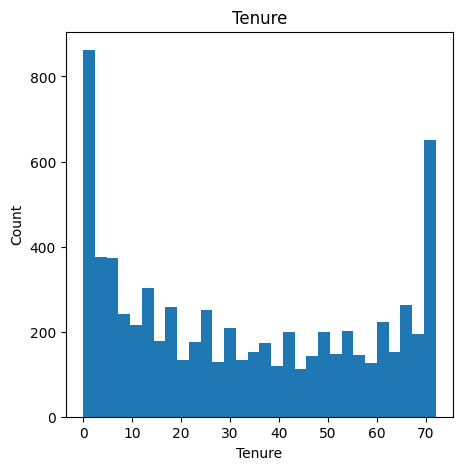

In [ ]:
plt.figure(figsize = (5,5))
plt.hist(df['tenure'],bins = 30)
plt.title('Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

# Relationships between Churn and Payment methods.

In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64